C:\Users\Integ\AppData\Local\Temp\ipykernel_9252\972848036.py:16: RuntimeWarning: invalid value encountered in sqrt
  z1 = -b / 2 + np.sqrt(b**2 - 4) / 2
C:\Users\Integ\AppData\Local\Temp\ipykernel_9252\972848036.py:17: RuntimeWarning: invalid value encountered in sqrt
  z2 = -b / 2 - np.sqrt(b**2 - 4) / 2


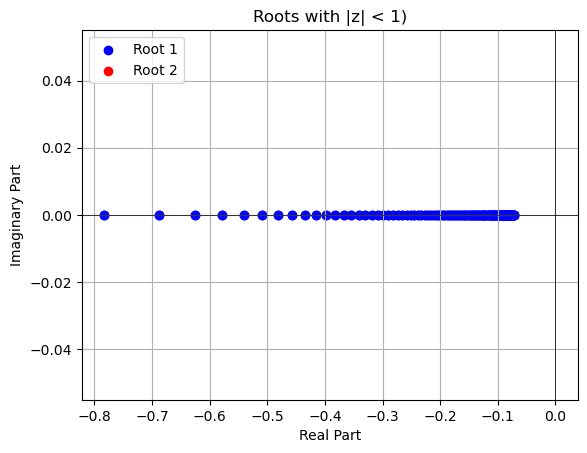

In [146]:
# Modified code based on the provided feedback and context
import numpy as np 
import matplotlib.pyplot as plt 

a = np.linspace(-4, 4, 400) 

def z_roots_modified(ldt_vals):
    z1_real = []
    z1_img = []
    z2_real = []
    z2_img = []

    for ldt in ldt_vals:
        b = ldt**2 - 2
        
        z1 = -b / 2 + np.sqrt(b**2 - 4) / 2
        z2 = -b / 2 - np.sqrt(b**2 - 4) / 2

        # Check if the magnitude of the roots is less than 1
        if np.abs(z1) < 1:
            z1_real.append(z1.real)
            z1_img.append(z1.imag)
        if np.abs(z2) < 1:
            z2_real.append(z2.real)
            z2_img.append(z2.imag)
    
    # Plotting
    plt.scatter(z1_real, z1_img, label='Root 1', color='blue')
    plt.scatter(z2_real, z2_img, label='Root 2', color='red')
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.title('Roots with |z| < 1)')
    plt.grid(True)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.legend()
    plt.show()

# Call the modified function with the array 'a'
z_roots_modified(a)


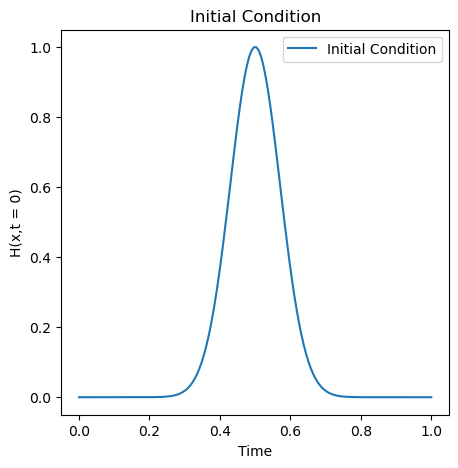

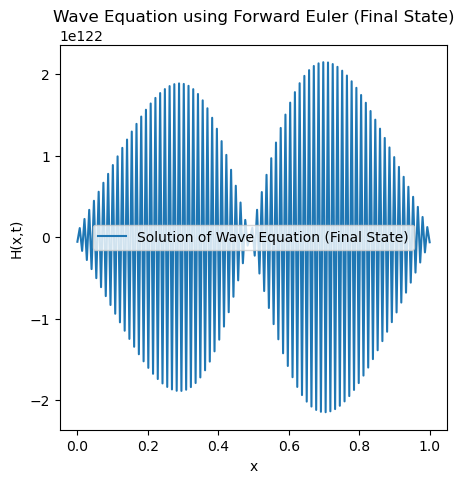

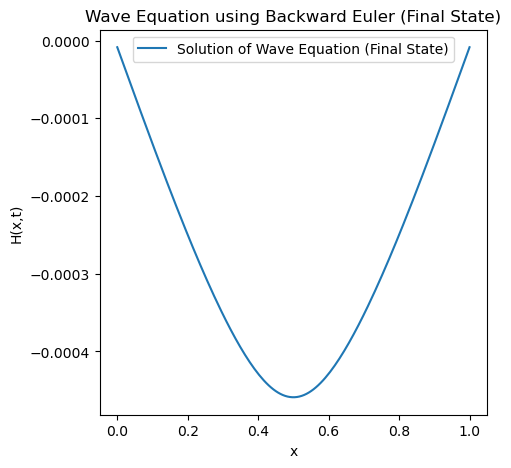

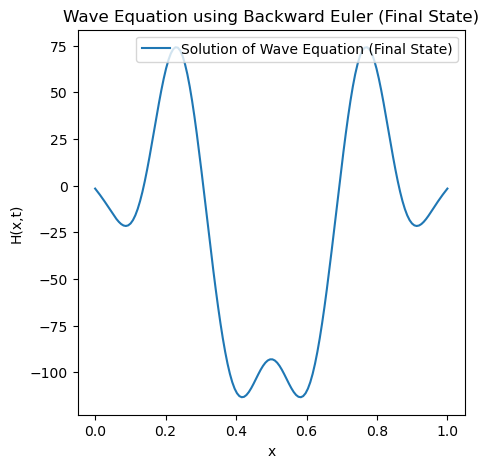

(None, None, None)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dst, idst

def Three_Methods():
    # Parameters
    N = 150  ### for smoothness baby
    L = 1.0
    h = L / N
    x = -L / 2 + h * np.arange(0, N) + h / 2
    #x = np.linspace(0, 1, N)
    k = np.arange(1, N + 1) * np.pi / L
    
    # Given f1
    f1 = 256
    lam = np.pi * f1
    dt = 1 / lam
    Nt = int(1/dt)

    # Initial condition functions
    def H0(x):
        return np.exp(-100*x**2)

    def Ht0(x):
        return np.zeros_like(x)

    # Initial conditions in spatial domain
    A0 = H0(x)
    V0 = Ht0(x)

    # Compute DST of the initial conditions
    An = dst(A0, type=1)
    Vn = dst(V0, type=1)

    # Plot initial condition
    plt.figure(figsize=(5, 5))
    plt.plot(x, A0, label="Initial Condition")
    plt.xlabel("Time")
    plt.ylabel("H(x,t = 0)")
    plt.title("Initial Condition")
    plt.legend()
    plt.show()

    # Time evolution using Forward Euler
    def FE(Nt, An, Vn):
        for n in range(Nt):
        # Update in spectral domain using provided system
            An1 = An + dt * Vn
            Vn1 = Vn - dt * (2*np.pi*f1*k) * An
        
            An = An1
            Vn = Vn1

    # After time evolution, transform back to spatial domain
        A_final = idst(An, type=1)

    # Plotting the final state
        plt.figure(figsize=(5, 5))
        plt.plot(x, A_final, label="Solution of Wave Equation (Final State)")
        plt.xlabel("x")
        plt.ylabel("H(x,t)")
        plt.title("Wave Equation using Forward Euler (Final State)")
        plt.legend()
        plt.show()

    def BE(Nt, An, Vn):
        for n in range(Nt):
            denominator = 1 + dt**2 * (2 * np.pi * f1 * k)**2
            An1 = (An + dt * Vn) / denominator
            Vn1 = Vn - dt * (2 * np.pi * f1 * k) * An1
        
            An = An1
            Vn = Vn1

    # After time evolution, transform back to spatial domain
        A_final = idst(An, type=1)

    # Plotting the final state
        plt.figure(figsize=(5, 5))
        plt.plot(x, A_final, label="Solution of Wave Equation (Final State)")
        plt.xlabel("x")
        plt.ylabel("H(x,t)")
        plt.title("Wave Equation using Backward Euler (Final State)")
        plt.legend()
        plt.show()

    def Verlet(Nt, An, Vn):
        for i in range(Nt):
            Vn1 = -(2 * np.pi * f1 * k)*dt*An + Vn
            An1 = dt*Vn1 + An

            Vn = Vn1
            An = An1

        A_final = idst(An, type=1)

    # Plotting the final state
        plt.figure(figsize=(5, 5))
        plt.plot(x, A_final, label="Solution of Wave Equation (Final State)")
        plt.xlabel("x")
        plt.ylabel("H(x,t)")
        plt.title("Wave Equation using Backward Euler (Final State)")
        plt.legend()
        plt.show()

    return FE(Nt, An, Vn), BE(Nt, An, Vn), Verlet(Nt, An, Vn)

Three_Methods()


In [30]:
import numpy as np
from scipy.fftpack import dst, idst
from IPython.display import Audio

# Parameters
N = 150
L = 1.0
h = L / N
x = np.linspace(0, 1, N)
k = np.arange(1, N + 1) * np.pi / L

# Given f1
f1 = 256
lam = np.pi * f1
dt = 1 / lam
N_Time_Steps = int(1/dt)

# Initial condition functions
def H0(x):
    return np.exp(-200*((x-L/2)**2)/2)

def Ht0(x):
    return np.zeros_like(x)

# Initial conditions in spatial domain
A0 = H0(x)
V0 = Ht0(x)

# Compute DST of the initial conditions
An = dst(A0, type=1)
Vn = dst(V0, type=1)

# Simulation loop
Pickup = 4
S = np.zeros(N_Time_Steps)
for n in range(N_Time_Steps):
    Vn1 = -(2 * np.pi * f1 * k) * dt * An + Vn
    An1 = dt * Vn1 + An

    Vn = Vn1
    An = An1

    # Calculate the actual wave from frequency data
    Hn = idst(An)
    S[n] = Hn[Pickup]

# Play the sound
Samp_rate = int(len(S) / 1.0)
Audio(S, rate=Samp_rate)


S_normalized = S / np.max(np.abs(S))
Audio(S_normalized, rate=Samp_rate)

In [36]:
from scipy.io.wavfile import write

Pickup = 4
S = np.zeros(N_Time_Steps)
for i in range(N_Time_Steps):
        Vn1 = -(2 * np.pi * f1 * k)*dt*An + Vn
        An1 = dt*Vn1 + An

        Vn = Vn1
        An = An1

    # Calculate the actual wave from frequency data
        Hn = idst(An)
        S[n] = Hn[Pickup]

# Play the sound
Samp_rate = int(len(S) / 1.0)
Audio(S, rate=Samp_rate)


S_normalized = S / np.max(np.abs(S))
Audio(S_normalized, rate=Samp_rate)

# Scale and ensure data is in int16 range for WAV format
scaled_S = np.int16(S_normalized / np.max(np.abs(S_normalized)) * 32767)

# Save to a WAV file
write("verlet.wav", Samp_rate, scaled_S)
